# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

## Exploratory analysis

In [2]:
data = pd.read_csv('Intern Challenge.csv')
data.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


Let's check order amount over time

In [3]:
data['created_at'] = pd.DatetimeIndex(data.created_at).normalize()
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13
1,2,92,925,90,1,cash,2017-03-03
2,3,44,861,144,1,cash,2017-03-14
3,4,18,935,156,1,credit_card,2017-03-26
4,5,18,883,156,1,credit_card,2017-03-01


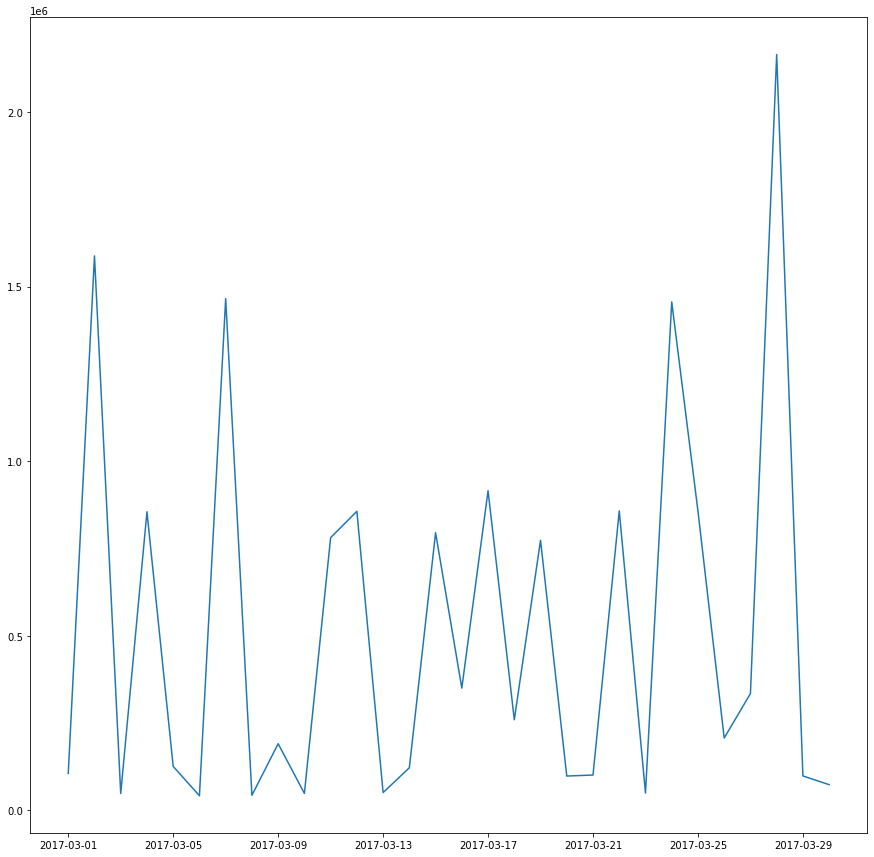

In [4]:
order_amount_by_day = data.groupby([data['created_at']])['order_amount'].sum()
plt.figure(figsize=(15, 15))
plt.plot(order_amount_by_day)

The trend of data fluctuate too much. Moreover, the seasonality of time series seems very unnatural for such a thing like sneakers. Let's look closer to the number of transaction.

In [5]:
total_items_counts = data['total_items'].value_counts().sort_index()
total_items_counts

1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: total_items, dtype: int64

As you can notice there a big anomaly in number of items. About 17 transaction were made in enourmously rate of 2000 sneakers. Let's look at them closely.

In [6]:
anomaly = data[data['total_items']==2000].sort_values(by=['created_at'])
anomaly

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02
4646,4647,42,607,704000,2000,credit_card,2017-03-02
60,61,42,607,704000,2000,credit_card,2017-03-04
15,16,42,607,704000,2000,credit_card,2017-03-07
2297,2298,42,607,704000,2000,credit_card,2017-03-07
1436,1437,42,607,704000,2000,credit_card,2017-03-11
2153,2154,42,607,704000,2000,credit_card,2017-03-12
1362,1363,42,607,704000,2000,credit_card,2017-03-15
1602,1603,42,607,704000,2000,credit_card,2017-03-17
1562,1563,42,607,704000,2000,credit_card,2017-03-19


All anomalies are from the same shop, paid with the same method with the same total_items. That can mean everything, for example some sort of speculation from the shop/customer side, maybe the shop is a one of the big supplier in the market, error in data collection process or simpy duplicated row. It will be better to report such type of data to data collection team or team manager as soon as possible.

Let's check the current metric without this records.

In [7]:
data_without_anomalies = data.drop(anomaly.index)
AOV = data_without_anomalies['order_amount'].sum()/data_without_anomalies['total_items'].sum()
print('AOV after deleting anomalies:', round(AOV,2))

AOV after deleting anomalies: 378.18


After cleaning the dataset AOV seems very robust metric. But as we do not have any information about anomalies we should reconsider the choice of metric. Let's plot the order amounts.

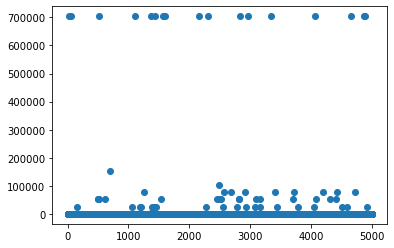

In [10]:
plt.scatter(data.order_id,data.order_amount)

The most observations falls in the dark blue line in the bottom of the plot. As you can see from the graph dataset have many extremes which affect it too much. The best practise will be to use robust estimate like median.

In [11]:
np.median(data.order_amount)

284.0

From the graph above, I also noticed that not only detected anomalies are seems unnatural. The dataset has many order_amounts which are around 20000. As the number of total_items is not more than 8, it seems very contradictible. Let's look at them.

In [23]:
maxes = data_without_anomalies.groupby(data_without_anomalies['total_items'])['order_amount'].max()
maxes

total_items
1     25725
2     51450
3     77175
4    102900
5      1760
6    154350
8      1064
Name: order_amount, dtype: int64

Max value of Order_amount for each total_item are 25725 * total_times. Here is 2 explanation:
1. DJ Khaled x Air Jordan 3 ‘Grateful‘ model of sneakers becomes very popular.(very unlikely reason).
2. There were mistakes in data entry stage (likely reason).

# Final Answers:

Q1.1: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. <br>
Answer:There was some invalid data where the order_amount equal to 25725 * total_items and suspicious data of large order of 2000 sneakers from the same shop.<br>
Q1.2: What metric would you report for this dataset?<br>
Answer: AOV still seems very good metric for dataset, if we exclude all anomalies and suspicious entries. However, as I have not addititonal information about the data, I can not drop them. So, I decided to choose robust metric, which will not be affected by extreme values and it is median. <br>
Q1.3: What is its value?<br>
Answer: The value of median is 284.0

# Question 2

Q2.1: How many orders were shipped by Speedy Express in total?<br>
      Answer:54<br>
SELECT Count(Orders.OrderID) FROM Orders, Shippers WHERE Orders.ShipperID = Shippers.ShipperID AND Shippers.ShipperName = 'Speedy Express'<br>
Q2.2: What is the last name of the employee with the most orders?
Answer: Peacock<br>
SELECT Count(*), Employees.LastName FROM Orders, Employees WHERE Orders.EmployeeID = Employees.EmployeeID GROUP BY Orders.EmployeeID ORDER BY Count(*) DESC LIMIT 1<br>
Q2.3: What product was ordered the most by customers in Germany?<br>
Answer: Boston Crab Meat<br>
SELECT SUM(OrderDetails.Quantity), Products.ProductName FROM Products, Orders, OrderDetails, Customers WHERE Customers.CustomerID = Orders.CustomerID and OrderDetails.OrderID = Orders.OrderID and Customers.Country = 'Germany' and Products.ProductID = OrderDetails.ProductID Group BY Products.ProductID ORDER BY SUM(OrderDetails.Quantity) DESC Limit 1 <br>